In [1]:
!cp /usr/local/share/jupyterhub/linregress_3D.py .

In [2]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import gsw
from mpl_toolkits.basemap import Basemap
from scipy import stats
from linregress_3D import lag_linregress_3D
%config InlineBackend.figure_formats = ['svg'] #이미지는 화질이 너무 안좋음. SVG로 설정
%matplotlib inline

In [3]:
#Learn to open multiple netcdf files and to use simple xarray commands

In [4]:
ds=xr.open_mfdataset('/usr/local/share/jupyterhub/data/ersst4/ersst.v4.*')

In [5]:
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lev: 1, lon: 180, time: 1982)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2019-02-01
Data variables:
    sst      (time, lev, lat, lon) float32 dask.array<shape=(1982, 1, 89, 180), chunksize=(1, 1, 89, 180)>
    ssta     (time, lev, lat, lon) float32 dask.array<shape=(1982, 1, 89, 180), chunksize=(1, 1, 89, 180)>
Attributes:
    Conventions:                CF-1.6
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link:              C00884
    id:                         ersst.v4.185401
    naming_authority:           gov.noaa.ncdc
    title:                      NOAA ERSSTv4 (in situ only)
    summary:                    ERSST.v4 is developped based on v3b after rev...
    institution:          

In [6]:
testsst=ds.sst.sel(lev=0,lat=0.,lon=180.)
testsst

<xarray.DataArray 'sst' (time: 1982)>
dask.array<shape=(1982,), dtype=float32, chunksize=(1,)>
Coordinates:
    lat      float64 0.0
    lev      float64 0.0
    lon      float64 180.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2019-02-01
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0

In [7]:
testsst2=ds.sst.isel(lev=0,lat=45,lon=90)
testsst2

<xarray.DataArray 'sst' (time: 1982)>
dask.array<shape=(1982,), dtype=float32, chunksize=(1,)>
Coordinates:
    lat      float64 2.0
    lev      float64 0.0
    lon      float64 180.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2019-02-01
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0

In [8]:
testsst3=ds.sst.isel(lev=0,lat=45,lon=90,drop=True)
testsst3

<xarray.DataArray 'sst' (time: 1982)>
dask.array<shape=(1982,), dtype=float32, chunksize=(1,)>
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2019-02-01
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0

In [9]:
testfill=ds.sst.sel(lev=0,drop=True)
testfill

<xarray.DataArray 'sst' (time: 1982, lat: 89, lon: 180)>
dask.array<shape=(1982, 89, 180), dtype=float32, chunksize=(1, 89, 180)>
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2019-02-01
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0

# Homework

In [10]:
LongTermMean = ds.sst.sel(lev=0,drop=True).mean(axis=0)
np.shape(LongTermMean)
type(LongTermMean)
LongTermMean

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
dask.array<shape=(89, 180), dtype=float32, chunksize=(89, 180)>
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [11]:
LongTermMean.lon.min

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'lon' (lon: 180)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 

/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


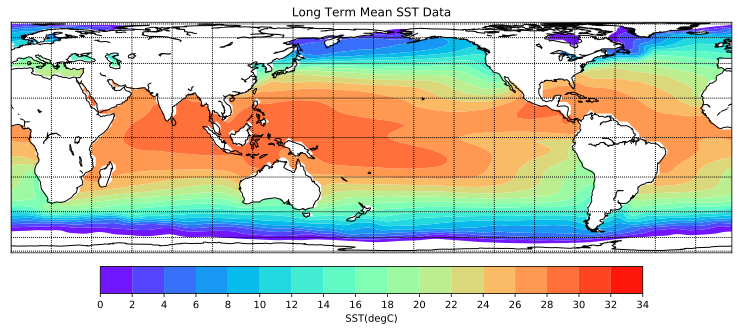

In [12]:
from matplotlib import cm
leningrad, stlingrad=np.meshgrid(LongTermMean.lon,LongTermMean.lat)
### from matplotlib import cm
fighw=plt.figure(figsize=(15,5))
m=Basemap(projection='cea',llcrnrlon=0., llcrnrlat=-88., urcrnrlon=358., urcrnrlat=88.)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.)) #위도선
m.drawmeridians(np.arange(-180.,181.,20.)) #경도선
leningrad, stlingrad=m(leningrad, stlingrad)
m=plt.contourf(leningrad,stlingrad,LongTermMean,np.arange(0,36,2),cmap=cm.rainbow)
cax=fighw.add_axes()
plt.colorbar(fraction=0.1, pad=0.05, orientation='horizontal',ticks=np.arange(0,36,2),label='SST(degC)')
plt.title('Long Term Mean SST Data')
plt.show()


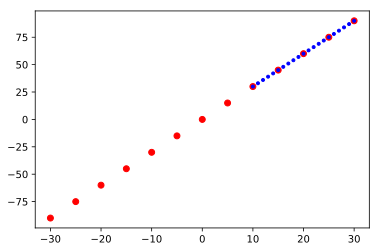

In [13]:
#Get global warming time series and learn linear interpolation

#Simple linear interpolation

xtest=np.arange(-30,31,5)#old x
ytest=xtest * 3
newxtest=np.arange(10,31,1)
newytest=np.interp(newxtest,xtest,ytest)

plt.plot(xtest,ytest,'ro')
plt.plot(newxtest,newytest,'b.')

In [14]:
!wget https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv

--2019-04-18 15:15:05--  https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv
Resolving www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.172, 205.167.25.171, 2610:20:8040:2::171, ...
Connecting to www.ncdc.noaa.gov (www.ncdc.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1580 (1.5K) [text/plain]
Saving to: ‘1880-2016.csv.1’

100%[======================================>] 1,580       --.-K/s   in 0s      

2019-04-18 15:15:06 (147 MB/s) - ‘1880-2016.csv.1’ saved [1580/1580]



In [15]:
!cat 1880-2016.csv

Global Land and Ocean Temperature Anomalies, January-December
Units: Degrees Celsius
Base Period: 1901-2000
Missing: -999
Year,Value
1880,-0.12
1881,-0.07
1882,-0.07
1883,-0.14
1884,-0.21
1885,-0.21
1886,-0.20
1887,-0.24
1888,-0.15
1889,-0.10
1890,-0.32
1891,-0.25
1892,-0.30
1893,-0.31
1894,-0.27
1895,-0.22
1896,-0.09
1897,-0.11
1898,-0.25
1899,-0.12
1900,-0.06
1901,-0.14
1902,-0.25
1903,-0.34
1904,-0.42
1905,-0.29
1906,-0.22
1907,-0.38
1908,-0.44
1909,-0.43
1910,-0.39
1911,-0.44
1912,-0.34
1913,-0.32
1914,-0.14
1915,-0.07
1916,-0.29
1917,-0.32
1918,-0.21
1919,-0.20
1920,-0.21
1921,-0.14
1922,-0.23
1923,-0.21
1924,-0.25
1925,-0.14
1926,-0.06
1927,-0.15
1928,-0.17
1929,-0.29
1930,-0.10
1931,-0.07
1932,-0.12
1933,-0.25
1934,-0.11
1935,-0.14
1936,-0.12
1937,-0.02
1938,-0.03
1939,-0.02
1940,0.09
1941,0.19
1942,0.15
1943,0.16
1944,0.29
1945,0.17
1946,-0.01
1947,-0.05
1948,-0.05
1949,-0.06
1950,-0.16
1951,-0.01
1952,0.02
1953,0.09
1954,-0.12
1955,-0.13
1956,-0.20
1957,0.05
1958,0.11
1959,0.0

In [16]:
#using pandas command read csv

df=pd.read_csv('1880-2016.csv', header=[4])
df

,Year,Value
0,1880,-0.12
1,1881,-0.07
2,1882,-0.07
3,1883,-0.14
4,1884,-0.21
5,1885,-0.21
6,1886,-0.20
7,1887,-0.24
8,1888,-0.15
9,1889,-0.10


In [17]:
df2=pd.read_csv('1880-2016.csv',skiprows=4,header=[0])
df2

,Year,Value
0,1880,-0.12
1,1881,-0.07
2,1882,-0.07
3,1883,-0.14
4,1884,-0.21
5,1885,-0.21
6,1886,-0.20
7,1887,-0.24
8,1888,-0.15
9,1889,-0.10


In [18]:
print(type(df))
GWdata=df.as_matrix()
print(type(GWdata))
GWdata[:,1]

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([-0.12, -0.07, -0.07, -0.14, -0.21, -0.21, -0.2 , -0.24, -0.15,
       -0.1 , -0.32, -0.25, -0.3 , -0.31, -0.27, -0.22, -0.09, -0.11,
       -0.25, -0.12, -0.06, -0.14, -0.25, -0.34, -0.42, -0.29, -0.22,
       -0.38, -0.44, -0.43, -0.39, -0.44, -0.34, -0.32, -0.14, -0.07,
       -0.29, -0.32, -0.21, -0.2 , -0.21, -0.14, -0.23, -0.21, -0.25,
       -0.14, -0.06, -0.15, -0.17, -0.29, -0.1 , -0.07, -0.12, -0.25,
       -0.11, -0.14, -0.12, -0.02, -0.03, -0.02,  0.09,  0.19,  0.15,
        0.16,  0.29,  0.17, -0.01, -0.05, -0.05, -0.06, -0.16, -0.01,
        0.02,  0.09, -0.12, -0.13, -0.2 ,  0.05,  0.11,  0.06,  0.02,
        0.08,  0.09,  0.11, -0.15, -0.08, -0.02, -0.01, -0.03,  0.1 ,
        0.04, -0.07,  0.03,  0.17, -0.07,  0.01, -0.08,  0.2 ,  0.12,
        0.23,  0.27,  0.3 ,  0.19,  0.34,  0.15,  0.14,  0.23,  0.37,
        0.38,  0.3 ,  0.43,  0.4 ,  0.26,  0.28,  0.34,  0.45,  0.32,
        0.52,  0.63,  0.44,  0.42,  0.54,  0.6 ,  0.61,  0.58,  0.66,
        0.61,  0.61,

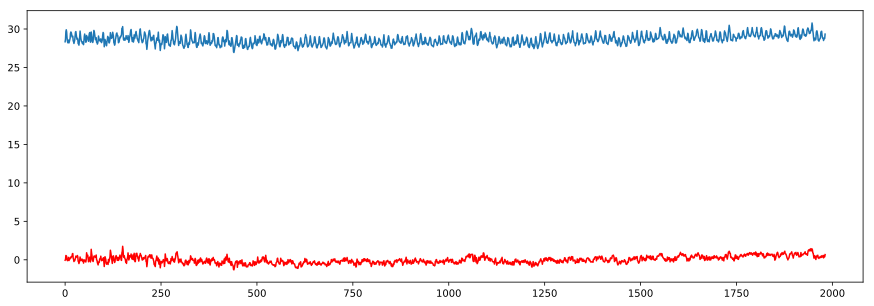

In [19]:
figS=plt.figure(figsize=(15,5))
sample=ds.sst.sel(lev=0,lat=0,lon=84.,drop=True)
plt.plot(sample)

sample_clm=sample.groupby("time.month").mean(dim='time')
sample=sample.groupby("time.month")-sample_clm
plt.plot(sample,'r')

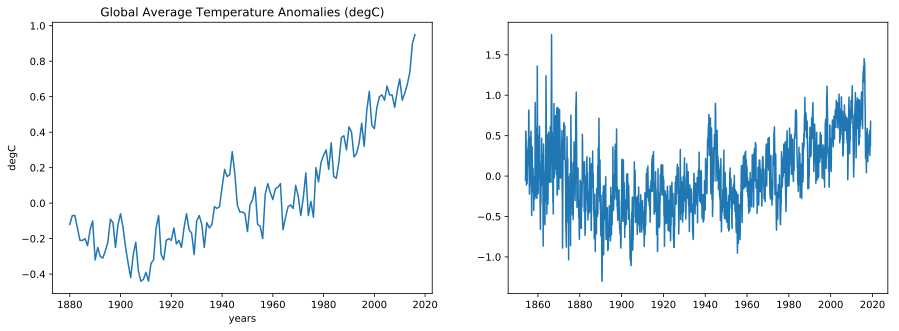

In [20]:
#Learn linear regression and perform GW curve fitting on a grid cell time series

figT=plt.figure(figsize=(15,5))
ax0=figT.add_subplot(121)
plt.plot(GWdata[:,0],GWdata[:,1])
plt.title('Global Average Temperature Anomalies (degC)')
plt.ylabel('degC')
plt.xlabel('years')

ax1=figT.add_subplot(122)
plt.plot(ds.sst.time,sample)
plt.show()

(1982,) (137,)
(1644,) (1982,)


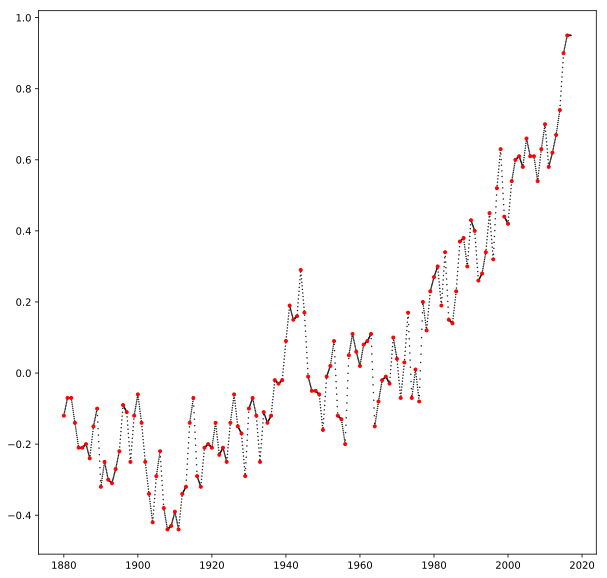

In [21]:
#sync tow data sets in time
print(np.shape(sample),np.shape(GWdata[:,1]))
newaxisforgw=np.linspace(1880,2017,(2017-1880)*12)
sample2=sample.sel(time=slice('1880-01-01','2016-12-01'))

gw=np.interp(newaxisforgw,GWdata[:,0],GWdata[:,1])
figX=plt.figure(figsize=(10,10))
plt.plot(newaxisforgw,gw,'k.',markersize=1)
plt.plot(GWdata[:,0],GWdata[:,1],'r.')

print(np.shape(gw),np.shape(sample))

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(gw, sample2)
sample2hat=slope*gw+intercept

Text(0, 0.5, 'sst at 35N and 174E (degC)')

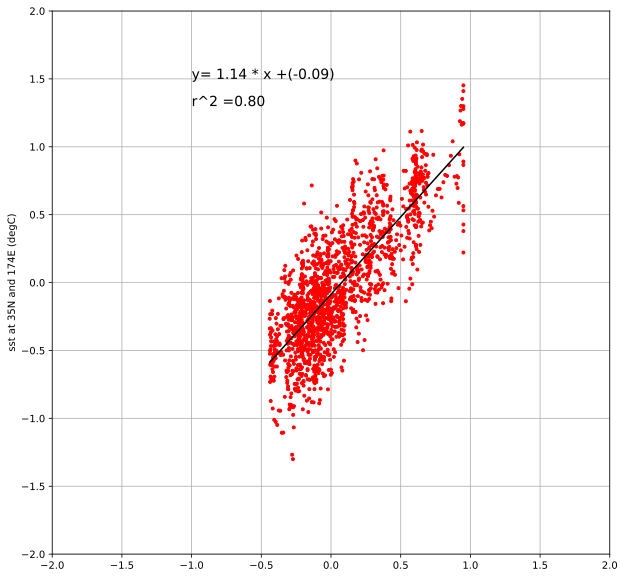

In [23]:
fig2=plt.figure(figsize=(10,10))
plt.plot(gw,sample2,'r.')
plt.ylim([-2,2])
plt.xlim([-2,2])
plt.plot(gw,sample2hat,'k')
plt.grid(True)
Mystring = 'y= ' + '{:4.2f}'.format(slope) + " * x +" + "({:4.2f}".format(intercept)+")"
MyStr2="r^2 =" + '{:4.2f}'.format(r_value)
plt.text(-1.,1.5,Mystring,fontsize=14)
plt.text(-1.,1.3,MyStr2,fontsize=14)
plt.ylabel('sst at 35N and 174E (degC)')

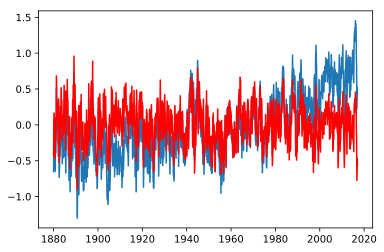

In [25]:
sample2nogw=sample2-sample2hat
plt.plot(newaxisforgw,sample2)
plt.plot(newaxisforgw,sample2nogw,'r')

In [33]:
#First, remove seasonal cycle
sstlong=ds.sst.sel(lev=0,drop=True)
sst=sstlong.sel(time=slice('1880-01-01','2016-12-01'))
sst_clm=sst.groupby("time.month").mean(dim='time')
sst=sst.groupby("time.month")-sst_clm
#Nomalize global warming time series
newgw=xr.DataArray(gw,dims='time',coords=[sst.time])
newgw1=newgw/np.std(newgw)
newgw1,sst=xr.align(newgw1,sst)
cov,cor,slope,intercept,pval,stderr=lag_linregress_3D(x=newgw1,y=sst)
np.shape(slope)

/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/array/reductions.py:384: RuntimeWarning: divide by zero encountered in true_divide
  u = total / n
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/dask/array/reductions.py:384: RuntimeWarning: invalid value encountered in true_divide
  u = total / n
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  re

(89, 180)

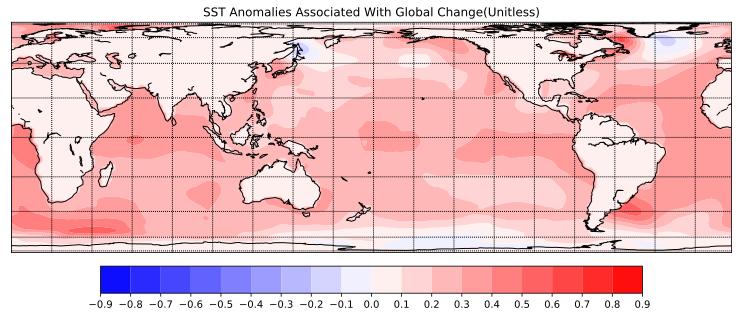

In [48]:
from matplotlib import cm
leningrad, stlingrad=np.meshgrid(LongTermMean.lon,LongTermMean.lat)
### from matplotlib import cm
fighw=plt.figure(figsize=(15,5))
m=Basemap(projection='cea',llcrnrlon=0., llcrnrlat=-88., urcrnrlon=358., urcrnrlat=88.)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.)) #위도선
m.drawmeridians(np.arange(-180.,181.,20.)) #경도선
leningrad, stlingrad=m(leningrad, stlingrad)
m=plt.contourf(leningrad,stlingrad,slope,np.arange(-0.9,1.0,.1),cmap=cm.bwr)
cax=fighw.add_axes()
plt.colorbar(fraction=0.1, pad=0.05, orientation='horizontal',ticks=np.arange(-0.9,1.0,.1))
plt.title('SST Anomalies Associated With Global Change(Unitless)')
plt.show()
